# Домашнее задание

**Скачайте текст войны и мир (ссылка на [github](https://github.com/netology-code/ds3-spring-2018/tree/master/7.%20Time_series/7.4/war_and_peace) и [гугл диск](https://drive.google.com/drive/u/2/folders/1aM7cNI6Qs7AyeYpQ8lNg7vLsHzIl0JbU))**

In [1]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()

**Очистите его, оставив только русские буквы и символы пробела.**

In [2]:
def get_text(filename):
    with open(filename, 'r', encoding='utf-8') as f:
        return f.read().lower()

text = ''
for i in range(1, 5):
    text += get_text(f'war_and_peace/tom_{i}.txt') + ' '
# замена символа перехода на новую строку на пробел
text = re.sub('\n', ' ', text)
# удаление всех символов кроме русских букв и пробелов
text = re.sub('[^а-яё ]','', text)
# замена подряд идущих пробелов на один пробел
text = re.sub(' +', ' ', text)
# удаление пробелов в начале и конце строки
text = text.strip()

text[:1000]

'лев толстой война и мир том том часть первая часть орая часть третья том лев николаевич толстой война и мир том часть первая е поместья мой верный раб ну что князь генуа и лукка стали не больше как поместьями фамилии бонапарте нет я вас предупреждаю если вы мне не скажете что у нас война если вы еще позволите себе защищать все гадости все ужасы этого антихриста право я верю что он антихрист я вас больше не знаю вы уж не друг мой вы уж не мой верный раб как вы говорите ну здравствуйте здравствуйте я вижу что я вас пугаю садитесь и рассказывайте так говорила в июле года известная анна павловна шерер фрейлина и приближенная императрицы марии феодоровны встречая важного и чиновного князя василия первого приехавшего на ее вечер анна павловна кашляла несколько дней у нее был грипп как она говорила грипп был тогда новое слово употреблявшееся только редкими в записочках разосланных утром с красным лакеем было написано без различия во всех или если вас граф или князь нет в виду ничего лучшего 

**Постройте матрицу переходных вероятностей.**

Создаём словарь русских букв (с учётом "ё" и " ")

In [3]:
RUSSIAN = sorted(list(set(text)))
POS = {l: i for i, l in enumerate(RUSSIAN)}

POS

{' ': 0,
 'а': 1,
 'б': 2,
 'в': 3,
 'г': 4,
 'д': 5,
 'е': 6,
 'ж': 7,
 'з': 8,
 'и': 9,
 'й': 10,
 'к': 11,
 'л': 12,
 'м': 13,
 'н': 14,
 'о': 15,
 'п': 16,
 'р': 17,
 'с': 18,
 'т': 19,
 'у': 20,
 'ф': 21,
 'х': 22,
 'ц': 23,
 'ч': 24,
 'ш': 25,
 'щ': 26,
 'ъ': 27,
 'ы': 28,
 'ь': 29,
 'э': 30,
 'ю': 31,
 'я': 32,
 'ё': 33}

In [27]:
probabilities = np.zeros((len(RUSSIAN), len(RUSSIAN)))

In [28]:
for i in range(len(text) - 1):
    cp = text[i]
    cn = text[i + 1]
    probabilities[POS[cp], POS[cn]] += 1

In [29]:
pd.DataFrame(probabilities, index=list(RUSSIAN), columns=list(RUSSIAN))

,,а,б,в,г,д,е,ж,з,и,...,ч,ш,щ,ъ,ы,ь,э,ю,я,ё
,0.0,6269.0,19650.0,40748.0,12640.0,20571.0,11501.0,5409.0,10513.0,30856.0,...,15174.0,2100.0,160.0,1.0,2.0,3.0,6917.0,87.0,3779.0,2.0
а,45519.0,22.0,1626.0,8779.0,2236.0,5103.0,2567.0,3153.0,10683.0,314.0,...,2000.0,3457.0,636.0,0.0,0.0,0.0,2.0,2051.0,6426.0,0.0
б,603.0,2609.0,24.0,215.0,27.0,59.0,5675.0,18.0,2.0,1947.0,...,55.0,12.0,538.0,271.0,10897.0,100.0,1.0,11.0,1172.0,1.0
в,17519.0,14789.0,36.0,89.0,96.0,825.0,11880.0,2.0,1333.0,8402.0,...,103.0,3195.0,11.0,36.0,6787.0,440.0,1.0,1.0,552.0,1.0
г,2149.0,2546.0,0.0,105.0,3.0,2822.0,1390.0,3.0,3.0,1945.0,...,71.0,19.0,0.0,0.0,3.0,5.0,0.0,9.0,3.0,0.0
д,3000.0,11648.0,87.0,2611.0,19.0,73.0,12048.0,38.0,7.0,6746.0,...,86.0,331.0,1.0,462.0,1650.0,1076.0,2.0,116.0,1139.0,2.0
е,46051.0,79.0,3022.0,3995.0,9288.0,7025.0,4389.0,2829.0,3257.0,492.0,...,2532.0,1818.0,1637.0,0.0,0.0,0.0,0.0,727.0,958.0,2.0
ж,542.0,3653.0,145.0,0.0,36.0,1995.0,10062.0,51.0,0.0,3704.0,...,109.0,0.0,0.0,0.0,0.0,110.0,1.0,77.0,0.0,0.0
з,3448.0,14082.0,462.0,2116.0,1054.0,1803.0,633.0,430.0,195.0,930.0,...,42.0,27.0,0.0,42.0,1499.0,1603.0,0.0,181.0,1252.0,0.0
и,52274.0,215.0,1119.0,6666.0,1315.0,4148.0,7295.0,1054.0,5268.0,2221.0,...,3342.0,937.0,382.0,0.0,0.0,1.0,0.0,941.0,4971.0,0.0


In [30]:
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

In [31]:
df = pd.DataFrame(probabilities, index=(c for c in RUSSIAN), columns=(c for c in RUSSIAN))

df

,,а,б,в,г,д,е,ж,з,и,...,ч,ш,щ,ъ,ы,ь,э,ю,я,ё
,0.000000,0.014111,0.044229,0.091717,0.028451,0.046302,0.025887,0.012175,0.023663,0.069452,...,0.034154,0.004727,0.000360,0.000002,0.000005,0.000007,0.015569,0.000196,0.008506,0.000005
а,0.241617,0.000117,0.008631,0.046599,0.011869,0.027087,0.013626,0.016736,0.056706,0.001667,...,0.010616,0.018350,0.003376,0.000000,0.000000,0.000000,0.000011,0.010887,0.034110,0.000000
б,0.015080,0.065245,0.000600,0.005377,0.000675,0.001475,0.141918,0.000450,0.000050,0.048690,...,0.001375,0.000300,0.013454,0.006777,0.272507,0.002501,0.000025,0.000275,0.029309,0.000025
в,0.164601,0.138951,0.000338,0.000836,0.000902,0.007751,0.111620,0.000019,0.012524,0.078942,...,0.000968,0.030019,0.000103,0.000338,0.063768,0.004134,0.000009,0.000009,0.005186,0.000009
г,0.047451,0.056217,0.000000,0.002318,0.000066,0.062311,0.030692,0.000066,0.000066,0.042946,...,0.001568,0.000420,0.000000,0.000000,0.000066,0.000110,0.000000,0.000199,0.000066,0.000000
д,0.042553,0.165220,0.001234,0.037035,0.000270,0.001035,0.170894,0.000539,0.000099,0.095688,...,0.001220,0.004695,0.000014,0.006553,0.023404,0.015262,0.000028,0.001645,0.016156,0.000028
е,0.243082,0.000417,0.015952,0.021088,0.049027,0.037082,0.023168,0.014933,0.017192,0.002597,...,0.013365,0.009596,0.008641,0.000000,0.000000,0.000000,0.000000,0.003838,0.005057,0.000011
ж,0.022116,0.149059,0.005917,0.000000,0.001469,0.081405,0.410577,0.002081,0.000000,0.151140,...,0.004448,0.000000,0.000000,0.000000,0.000000,0.004489,0.000041,0.003142,0.000000,0.000000
з,0.087477,0.357266,0.011721,0.053684,0.026740,0.045743,0.016059,0.010909,0.004947,0.023594,...,0.001066,0.000685,0.000000,0.001066,0.038030,0.040669,0.000000,0.004592,0.031764,0.000000
и,0.334854,0.001377,0.007168,0.042701,0.008424,0.026571,0.046730,0.006752,0.033745,0.014227,...,0.021408,0.006002,0.002447,0.000000,0.000000,0.000006,0.000000,0.006028,0.031843,0.000000


In [51]:
sum(df.loc['а', :])

1.0000000000000004

In [44]:
df.loc['й', ' ']

0.804344453064391

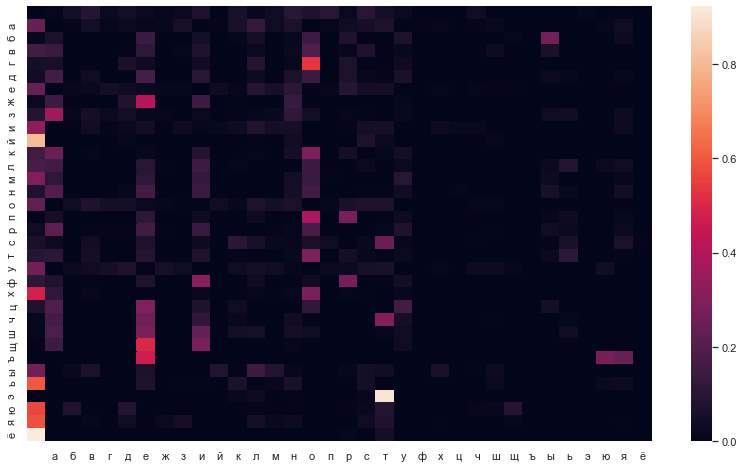

In [33]:
plt.figure(figsize=(14,8))
sns.heatmap(df)
plt.show()

**Посчитайте вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р**

In [10]:
# вычисляет вероятность получения указанной строки string
def get_proba(string):
    proba = 1.0 / len(RUSSIAN)
    for cp, cn in zip(string[1:], string[:-1]):
        proba *= probabilities[POS[cp], POS[cn]]
    return proba

In [11]:
words = []

for second in RUSSIAN:
    if second == ' ':
        continue
    for third in RUSSIAN:
        if third == ' ':
            continue
        word = f'п{second}{third}р'
        words.append(word)

words[:20]

['паар',
 'пабр',
 'павр',
 'пагр',
 'падр',
 'паер',
 'пажр',
 'пазр',
 'паир',
 'пайр',
 'пакр',
 'палр',
 'памр',
 'панр',
 'паор',
 'папр',
 'парр',
 'паср',
 'патр',
 'паур']

In [12]:
proba_total = 0

for word in words:
    proba_total += get_proba(word)

proba_total

0.0001272347958422281

**Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы "Б" и имеющее длину 8-мь символов**

In [47]:
# Генерация строки длиной 8 символов
# Для генерации каждого следующего символа мы берем последний записанный символ в строке
# Смотрим на вероятности перехода из текущего символа во все остальные
# И используем это распределение вероятностей для генерации следующего символа

s = 'б'
length = 8
for i in range(1, length):
    last_char = s[-1]
    index = POS[last_char]
    next_char = np.random.choice(list(RUSSIAN), p=probabilities[index])
    s += next_char

s

'бетыетов'

# Прогноз с использованием HMM

**[Выберите ряд](https://datamarket.com/data/list/?q=cat:fpg%20provider:tsdl) и оцените его через HMM. Попробуйте "построить" (через среднее каждой компоненты) наивный прогноз ряда.**

In [ ]:
!pip install hmmlearn

In [14]:
from hmmlearn.hmm import GaussianHMM

In [15]:
series = pd.read_csv("../1. Лекция/Series/mean-monthly-air-temperature-deg.csv")["Deg"]

In [16]:
values = series.values.reshape(-1,1)
values

array([[40.6],
       [40.8],
       [44.4],
       [46.7],
       [54.1],
       [58.5],
       [57.7],
       [56.4],
       [54.3],
       [50.5],
       [42.9],
       [39.8],
       [44.2],
       [39.8],
       [45.1],
       [47. ],
       [54.1],
       [58.7],
       [66.3],
       [59.9],
       [57. ],
       [54.2],
       [39.7],
       [42.8],
       [37.5],
       [38.7],
       [39.5],
       [42.1],
       [55.7],
       [57.8],
       [56.8],
       [54.3],
       [54.3],
       [47.1],
       [41.8],
       [41.7],
       [41.8],
       [40.1],
       [42.9],
       [45.8],
       [49.2],
       [52.7],
       [64.2],
       [59.6],
       [54.4],
       [49.2],
       [36.6],
       [37.6],
       [39.3],
       [37.5],
       [38.3],
       [45.5],
       [53.2],
       [57.7],
       [60.8],
       [58.2],
       [56.4],
       [49.8],
       [44.4],
       [43.6],
       [40. ],
       [40.5],
       [40.8],
       [45.1],
       [53.8],
       [59.4],
       [63

In [17]:
n_components = 1
best_score = float('inf')

for n in range(1, 14):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(values)
    score = model.score(values)
    if abs(score) < abs(best_score):
        n_components = n
        best_score = score
    print (n, score)

print('----')
print(n_components, best_score)

1 -855.6201905961935
2 -767.9220576513231
3 -729.7130998069008
4 -698.3653054078601
5 -659.627293647467
6 -662.2149629371443
7 -623.3182050675235
8 -602.2719528668745
9 -595.1312994850206
10 -575.3992390844198
11 -564.8616673127522
12 -562.9536913811298
13 -536.8226850448908
----
13 -536.8226850448908


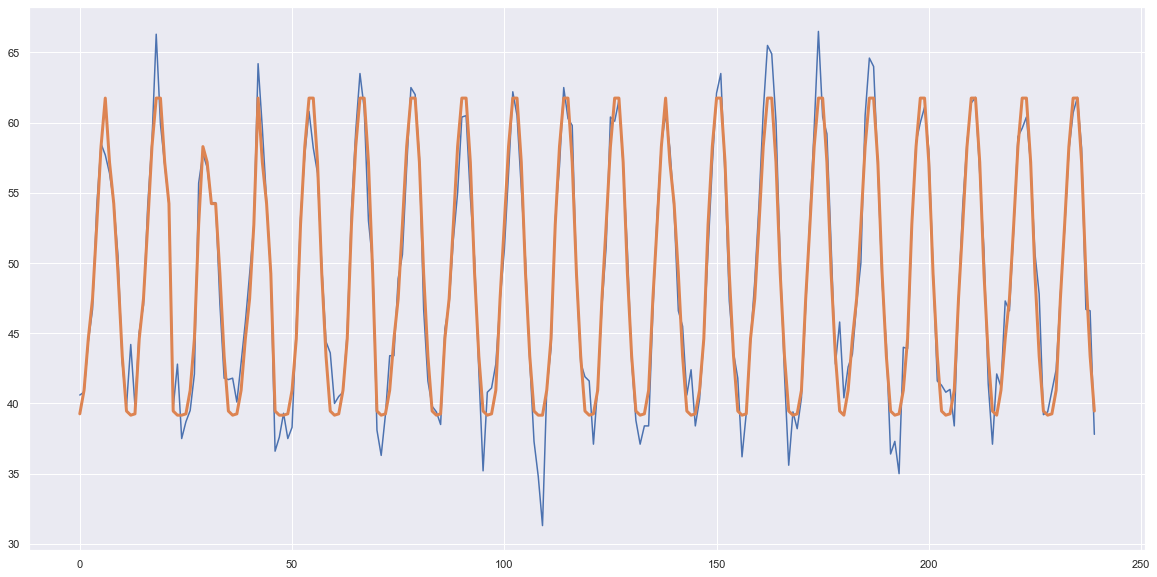

In [18]:
model = GaussianHMM(n_components=n_components,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]
    
plt.figure(figsize=(20, 10))
plt.plot(values)
plt.plot(means, linewidth=3)